In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-outliner/placement (1).csv


In [2]:
df = pd.read_csv('/kaggle/input/placement-outliner/placement (1).csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.skew()

cgpa                   -0.014530
placement_exam_marks    0.835642
placed                  0.044077
dtype: float64

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='placement_exam_marks'>

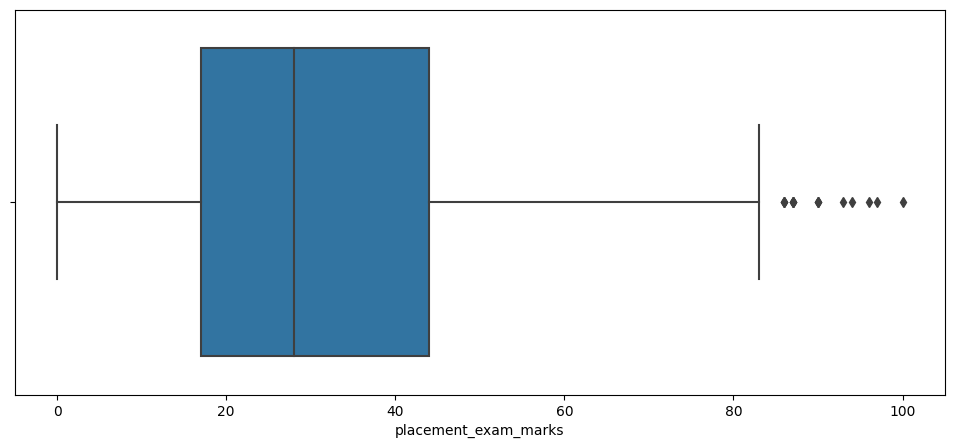

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(x = df['placement_exam_marks'])

In [8]:
#Find the Q1: 25th and Q3: 75th percentile
percentile_25 = df['placement_exam_marks'].quantile(0.25)
percentile_75 = df['placement_exam_marks'].quantile(0.75)
print('25th Percentile ',percentile_25)
print('75th Percentile ',percentile_75)

25th Percentile  17.0
75th Percentile  44.0


In [9]:
#find IQR = Q3-Q1
iqr = percentile_75 - percentile_25
print('IQR: ', percentile_75)


IQR:  44.0


upper limit = Q3+1.5IQR
lower limit = Q1 - 1.5IQR

In [10]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

upper limit:  84.5
lower limit:  -23.5


In [11]:
#Get the outliners
df_new = df[(df['placement_exam_marks'] < 84) ]

<ipython-input-12-a15716c25b95>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-12-a15716c25b95>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogra

<Axes: xlabel='placement_exam_marks'>

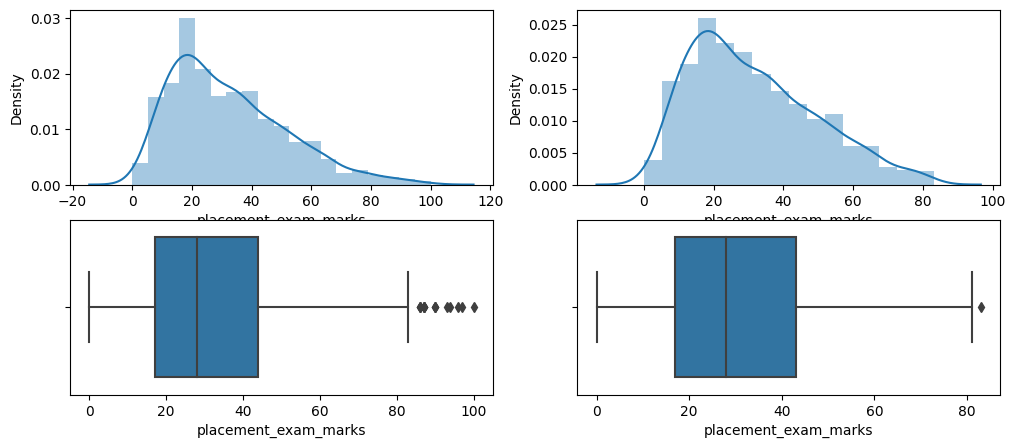

In [12]:
#plot the data and check outliers presence

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.distplot(df_new['placement_exam_marks'])

plt.subplot(2,2,3)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x = df_new['placement_exam_marks'])

In [13]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(df['placement_exam_marks'] > upper_limit, 
                                              upper_limit, 
                                              np.where(df['placement_exam_marks'] < lower_limit, lower_limit, df['placement_exam_marks']))

In [14]:
new_df_cap.shape

(1000, 3)

<ipython-input-15-5fc8615d5af8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-15-5fc8615d5af8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogram

<Axes: xlabel='placement_exam_marks'>

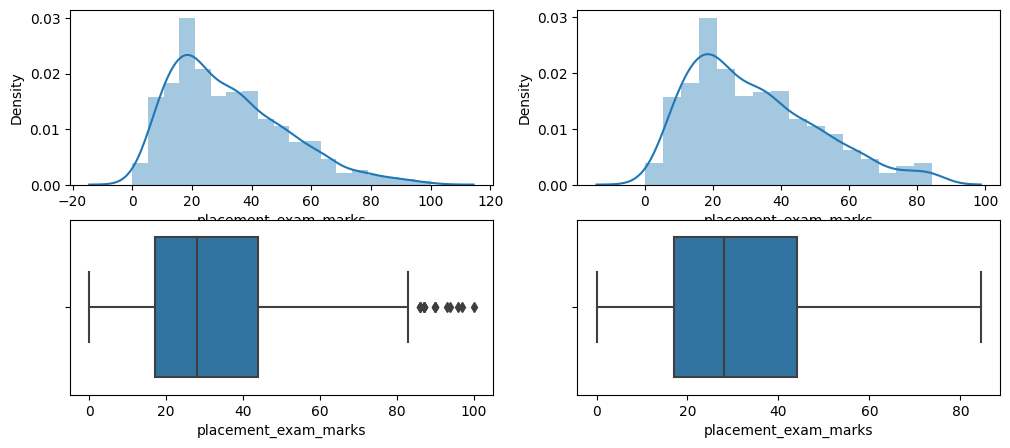

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,3)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x = new_df_cap['placement_exam_marks'])